## Construct Baseline
Using preprocessed sub-grids data and functions, find the baseline for whole travel space

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time

from itertools import permutations
from functions import *

np.random.seed(12345)

In [2]:
PATH_START = (121.46, 31.22) #(CNWGQ: 31.22N, 121.46E) 
PATH_END = (174.77, -36.87) #(NZAKL: 36.87S 174.77E)
THRESHOLD = 0.5

In [3]:
file_list = os.listdir('out')
file_list.sort()

In [4]:
grid_list = []

for file_name in file_list:
    if file_name.endswith('.csv'):
        with open(os.path.join('out', file_name), 'r') as f:
            grid = np.genfromtxt(f, delimiter=',')
            grid_list.append(grid)

In [5]:
grid_list_reshape = []
for grid in grid_list:
    if len(grid.shape) == 1:
        grid = grid.reshape(-1,1)
    grid_list_reshape.append(grid)

grid_list = grid_list_reshape

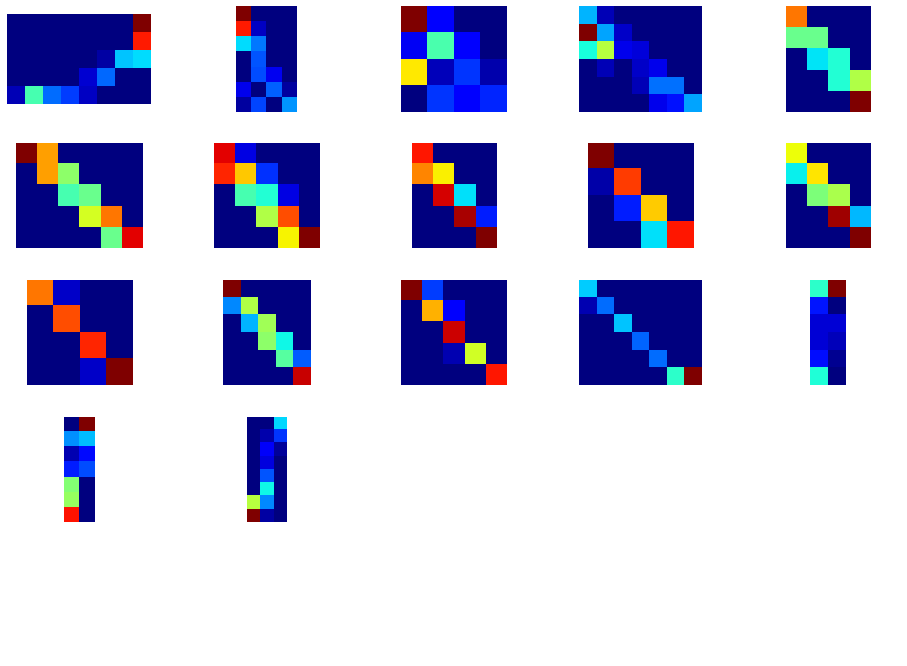

In [6]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(16,12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

i = 0
for row in ax:
    for col in row:
        if i == len(grid_list):
            col.plot()
            col.axis('off')
            continue
        col.imshow(grid_list[i], cmap='jet')
        #for (j,i),label in np.ndenumerate(grid_list[i]):
        #    col.text(i,j,int(label),ha='center',va='center')
        col.axis('off')
        i += 1

In [7]:
import pickle

out_name = 'out/grid_info_list'
with open(out_name, 'rb') as f:
    grid_info_list = pickle.load(f)

In [8]:
def get_n_routes(grid):
    n_routes = math.factorial(grid.shape[0]-1+grid.shape[1]-1)/math.factorial(grid.shape[0]-1)/math.factorial(grid.shape[1]-1)
    return int(n_routes)

In [9]:
for grid_info, grid in zip(grid_info_list, grid_list):
    print(grid_info, grid.shape, get_n_routes(grid))

[0, 4, 7, 0, 1, -1] (5, 8) 330
[7, 0, 10, 6, 1, 1] (7, 4) 84
[10, 6, 13, 9, 1, 1] (4, 4) 20
[13, 9, 19, 14, 1, 1] (6, 7) 462
[19, 14, 22, 18, 1, 1] (5, 4) 35
[22, 18, 27, 22, 1, 1] (5, 6) 126
[27, 22, 31, 26, 1, 1] (5, 5) 70
[31, 26, 34, 30, 1, 1] (5, 4) 35
[34, 30, 37, 33, 1, 1] (4, 4) 20
[37, 33, 40, 37, 1, 1] (5, 4) 35
[40, 37, 43, 40, 1, 1] (4, 4) 20
[43, 40, 47, 45, 1, 1] (6, 5) 126
[47, 45, 51, 49, 1, 1] (5, 5) 70
[51, 49, 57, 54, 1, 1] (6, 7) 462
[57, 54, 56, 59, -1, 1] (6, 2) 6
[56, 59, 55, 65, -1, 1] (7, 2) 7
[55, 65, 53, 72, -1, 1] (8, 3) 36


[0, 4, 7, 0, 1, -1] (5, 8) 330
time (s): 14.191375226713717


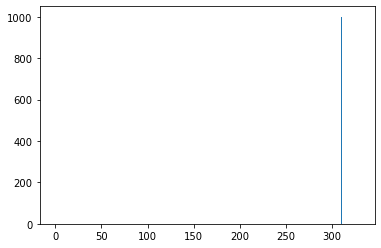

[7, 0, 10, 6, 1, 1] (7, 4) 84
time (s): 0.5783074963837862


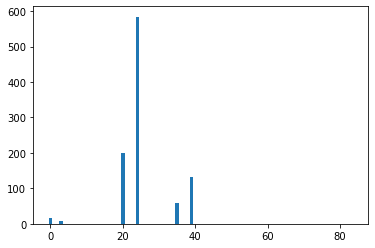

[10, 6, 13, 9, 1, 1] (4, 4) 20
time (s): 0.09849812928587198


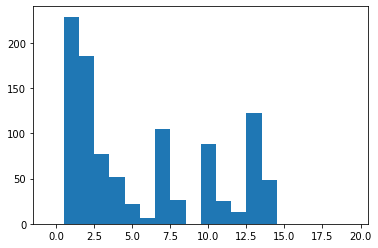

[13, 9, 19, 14, 1, 1] (6, 7) 462
time (s): 15.170305822975934


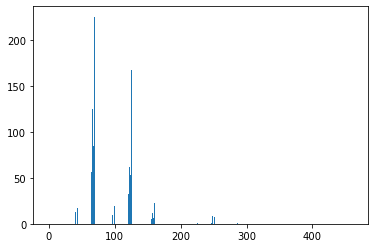

[19, 14, 22, 18, 1, 1] (5, 4) 35
time (s): 0.18740832805633545


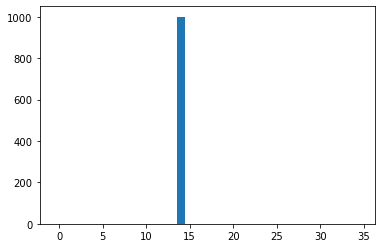

[22, 18, 27, 22, 1, 1] (5, 6) 126
time (s): 0.8278942396864295


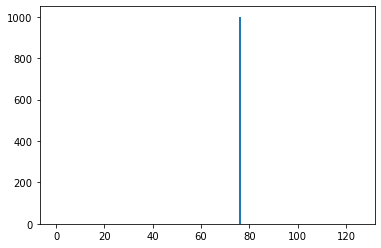

[27, 22, 31, 26, 1, 1] (5, 5) 70
time (s): 0.40741876419633627


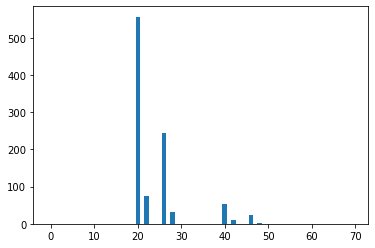

[31, 26, 34, 30, 1, 1] (5, 4) 35
time (s): 0.18732558842748404


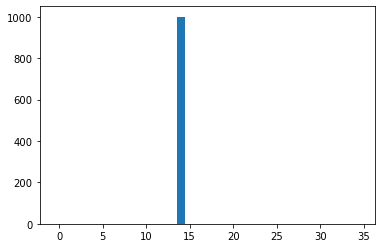

[34, 30, 37, 33, 1, 1] (4, 4) 20
time (s): 0.10036040563136339


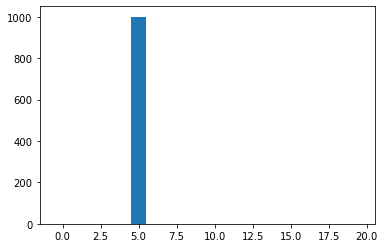

[37, 33, 40, 37, 1, 1] (5, 4) 35
time (s): 0.1867765849456191


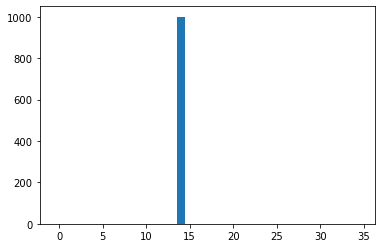

[40, 37, 43, 40, 1, 1] (4, 4) 20
time (s): 0.10037375707179308


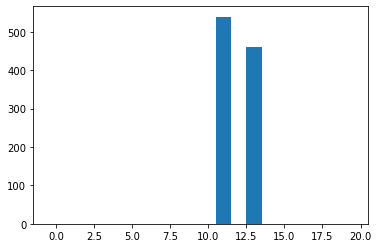

[43, 40, 47, 45, 1, 1] (6, 5) 126
time (s): 0.8335598828271031


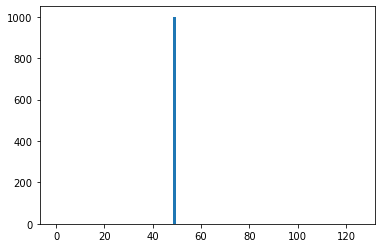

[47, 45, 51, 49, 1, 1] (5, 5) 70
time (s): 0.40046520810574293


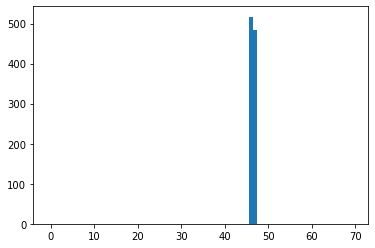

[51, 49, 57, 54, 1, 1] (6, 7) 462
time (s): 14.39803618285805


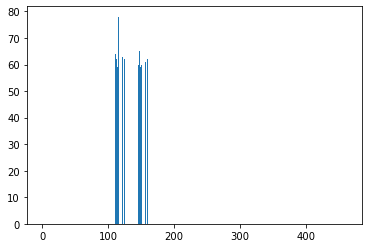

[57, 54, 56, 59, -1, 1] (6, 2) 6
time (s): 0.032922896556556225


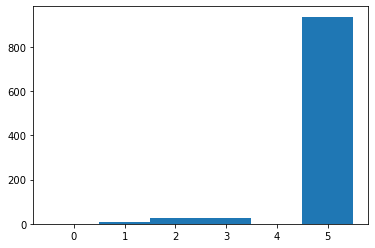

[56, 59, 55, 65, -1, 1] (7, 2) 7
time (s): 0.04076388757675886


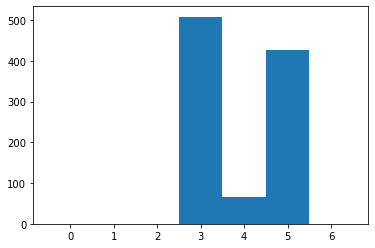

[55, 65, 53, 72, -1, 1] (8, 3) 36
time (s): 0.30755041539669037


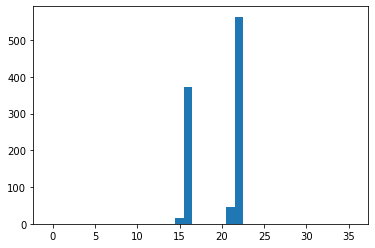

In [10]:
boot_sample_list = []
best_route_list = []
computation_time_list = []

for (x_s, y_s, x_e, y_e, x_d, y_d), X in zip(grid_info_list, grid_list):
    print([x_s, y_s, x_e, y_e, x_d, y_d], X.shape, get_n_routes(X))
    start_time = time.perf_counter()
    
    if x_d == -1:
        X = np.fliplr(X)
    if y_d == -1:
        X = np.flipud(X)
        
    unique_routes = get_unique_routes(X)
    unique_paths = get_path_from_routes(X, unique_routes)
    boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)
    
    boot_sample_out = []
    for idx in range(0,len(unique_routes)):
        boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
    boot_sample_out = np.vstack(boot_sample_out)
    boot_sample_list.append(boot_sample_out)
    
    #best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
    best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
    best_route_list.append(best_route)
    
    print('time (s): {}'.format(time.perf_counter()-start_time))
    computation_time_list.append([get_n_routes(X), time.perf_counter()-start_time])
    
    plt.bar(boot_sample_out[:,0], boot_sample_out[:,1], width=1)
    plt.show()

In [11]:
out_name = 'out/best_route_list'
with open(out_name, 'wb') as f:
    pickle.dump(best_route_list, f)

In [12]:
out_name = 'out/boot_sample_list'
with open(out_name, 'wb') as f:
    pickle.dump(boot_sample_list, f)